In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Reading in data

In [2]:
online = pd.read_csv('C:/Users/Kanika/Downloads/Shutterfly Assignment/online.csv')
order = pd.read_csv('C:/Users/Kanika/Downloads/Shutterfly Assignment/order.csv')

#### Exploring and Understanding data

In [3]:
online.head()

,session,visitor,dt,custno,category,event1,event2
0,419542,140970,2016-09-16 05:03:23,3840,1,NaN,1
1,3030130,14501,2017-11-13 04:58:12,70400,1,NaN,1
2,2638740,419353,2017-05-24 16:10:38,21248,1,NaN,1
3,880408,90673,2017-10-28 13:42:38,39168,1,NaN,1
4,2612179,191542,2016-05-17 06:30:32,47616,1,NaN,1


In [4]:
order.head()

,custno,ordno,orderdate,prodcat2,prodcat1,revenue
0,18944,64694,2016-11-27 20:57:20,NaN,1,53.30
1,18944,114405,2017-04-29 20:18:04,NaN,1,0.10
2,18944,28906,2017-04-23 21:31:03,NaN,1,141.66
3,36096,62681,2016-02-25 07:16:33,NaN,1,36.82
4,1,1,2017-06-12 08:27:59,NaN,1,8.35


In [5]:
online.describe()

,session,visitor,custno,category,event1,event2
count,9.547740e+05,954774.000000,954774.000000,954774.000000,164928.000000,954774.000000
mean,1.893075e+06,246963.121538,37011.541473,2.684933,4.501576,5.666678
std,1.086779e+06,145929.540403,21559.691539,0.571617,3.494639,2.368242
min,2.000000e+00,1.000000,6.000000,1.000000,1.000000,1.000000
25%,9.554362e+05,125528.250000,17985.000000,2.000000,1.000000,4.000000
50%,1.903075e+06,252901.000000,38040.000000,3.000000,4.000000,7.000000
75%,2.845886e+06,377563.000000,56516.000000,3.000000,7.000000,7.000000
max,3.750761e+06,505850.000000,71427.000000,3.000000,11.000000,10.000000


In [6]:
order.describe()

,custno,ordno,prodcat2,prodcat1,revenue
count,263278.000000,263278.000000,261455.000000,263278.000000,263278.000000
mean,19244.733855,64173.395620,37.384330,2.920924,74.939302
std,19414.103037,43064.595961,44.639098,1.696565,43.277175
min,1.000000,1.000000,2.000000,1.000000,0.000000
25%,3438.000000,26505.000000,5.000000,2.000000,37.430000
50%,11389.500000,59040.500000,16.000000,2.000000,74.930000
75%,31459.000000,98340.750000,58.000000,4.000000,112.280000
max,71427.000000,154405.000000,263.000000,7.000000,150.000000


In [7]:
# checking if there are any missing values
online.isnull().sum(axis = 0)

session          0
visitor          0
dt               0
custno           0
category         0
event1      789846
event2           0
dtype: int64

In [8]:
# checking if there are any missing values
order.isnull().sum(axis = 0)

custno          0
ordno           0
orderdate       0
prodcat2     1823
prodcat1        0
revenue         0
dtype: int64

In [9]:
len(order.ordno.unique())

149717

In [10]:
len(order.custno.unique())

70264

In [11]:
len(online.custno.unique())

57584

In [12]:
order['orderdate'].min()

'2016-01-01 05:05:14'

In [13]:
order['orderdate'].max()

'2019-01-02 23:54:58'

* There are a total of 954,774 session according to online data
* There are a total of 263,278 orders according to order data
* We also see that not all orders are unique, and there exist only 149717 unique orders inplying different products are in different rows of the data
* There are a total of 70,264 unique customers who have ordered whereas 57,584 customers who have had an online session
* We observe that majority of event1 in the online data is NaN and some of prodcat2 is missing for some of the order data

In [14]:
# converting to pandas datetime format
order['orderdate'] = pd.to_datetime(order['orderdate'])
online['dt'] = pd.to_datetime(online['dt'])

#### Feature engineering

In [15]:
# Extracting day, hour from the data into separate columns to do time of day and day of week analysis

online['month'] = pd.DatetimeIndex(online['dt']).month
online['week'] = pd.DatetimeIndex(online['dt']).week
online['day'] = pd.DatetimeIndex(online['dt']).weekday
online['hour'] = pd.DatetimeIndex(online['dt']).hour

In [16]:
online.head()

,session,visitor,dt,custno,category,event1,event2,month,week,day,hour
0,419542,140970,2016-09-16 05:03:23,3840,1,NaN,1,9,37,4,5
1,3030130,14501,2017-11-13 04:58:12,70400,1,NaN,1,11,46,0,4
2,2638740,419353,2017-05-24 16:10:38,21248,1,NaN,1,5,21,2,16
3,880408,90673,2017-10-28 13:42:38,39168,1,NaN,1,10,43,5,13
4,2612179,191542,2016-05-17 06:30:32,47616,1,NaN,1,5,20,1,6


In [17]:
# Extracting day, hour from the data into separate columns to do time of day and day of week analysis

order['month'] = pd.DatetimeIndex(order['orderdate']).month
order['week'] = pd.DatetimeIndex(order['orderdate']).week
order['day'] = pd.DatetimeIndex(order['orderdate']).weekday
order['hour'] = pd.DatetimeIndex(order['orderdate']).hour

In [18]:
order.head()

,custno,ordno,orderdate,prodcat2,prodcat1,revenue,month,week,day,hour
0,18944,64694,2016-11-27 20:57:20,NaN,1,53.30,11,47,6,20
1,18944,114405,2017-04-29 20:18:04,NaN,1,0.10,4,17,5,20
2,18944,28906,2017-04-23 21:31:03,NaN,1,141.66,4,16,6,21
3,36096,62681,2016-02-25 07:16:33,NaN,1,36.82,2,8,3,7
4,1,1,2017-06-12 08:27:59,NaN,1,8.35,6,24,0,8


In [19]:
mean_monthly = order.groupby(['month'])['revenue'].mean()

In [20]:
orders_monthly = order.groupby(['month'])['ordno'].count()

In [21]:
popular_categories = order.groupby(['prodcat1'])['ordno'].count()

In [22]:
mean_category = order.groupby(['prodcat1'])['revenue'].mean()

In [23]:
category_seasonality_revenue = order.groupby(['month', 'prodcat1'])['revenue'].sum()

In [24]:
time_of_day = order.groupby(['hour'])['revenue'].sum()
day_of_week = order.groupby(['day'])['revenue'].sum()
week_of_month = order.groupby(['week'])['revenue'].sum()

In [25]:
time_of_day_s = online.groupby(['hour'])['session'].count()
day_of_week_s = online.groupby(['day'])['session'].count()
week_of_month_s = online.groupby(['week'])['session'].count()

<Figure size 720x288 with 0 Axes>

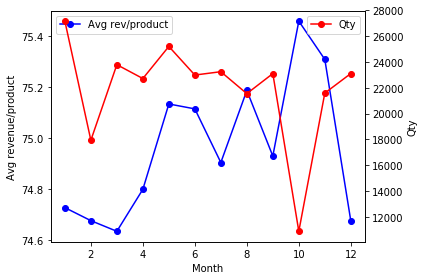

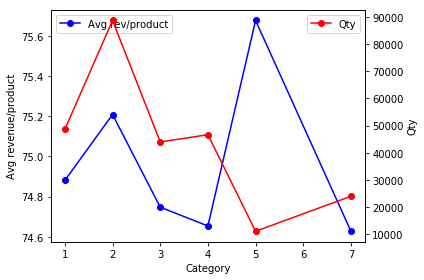

In [26]:
plt.figure(figsize = (10, 4))
fig, ax1 = plt.subplots()
ax1.plot(mean_monthly, 'bo-', label = 'Revenue')
ax1.set_ylabel('Avg revenue/product')
ax1.set_xlabel('Month')
ax2 = ax1.twinx()
ax2.plot(orders_monthly, 'ro-', label = 'Qty')
ax2.set_ylabel('Qty')
ax1.legend(['Avg rev/product'], loc='upper left')
ax2.legend(['Qty'], loc='upper right')
fig.tight_layout()
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(mean_category, 'bo-', label = 'Revenue')
ax1.set_ylabel('Avg revenue/product')
ax1.set_xlabel('Category')
ax2 = ax1.twinx()
ax2.plot(popular_categories, 'ro-', label = 'Qty')
ax2.set_ylabel('Qty')
ax1.legend(['Avg rev/product'], loc='upper left')
ax2.legend(['Qty'], loc='upper right')
fig.tight_layout()
plt.show()

<Figure size 720x288 with 0 Axes>

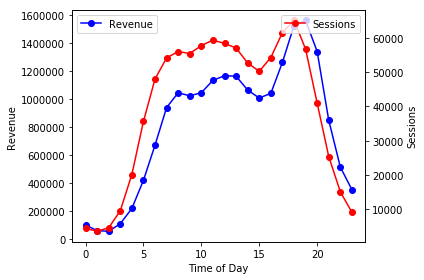

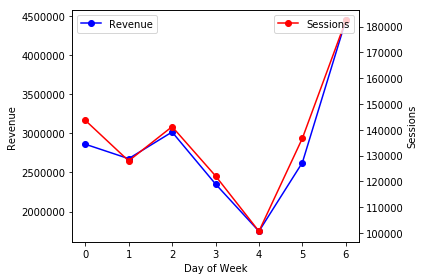

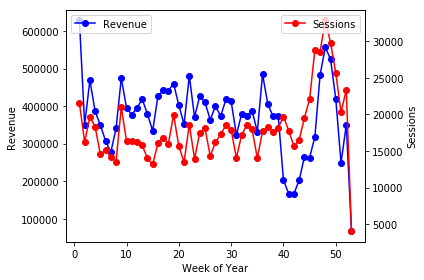

In [27]:
plt.figure(figsize = (10, 4))
fig, ax1 = plt.subplots()
ax1.plot(time_of_day, 'bo-', label = 'Revenue')
ax1.set_ylabel('Revenue')
ax1.set_xlabel('Time of Day')
ax2 = ax1.twinx()
ax2.plot(time_of_day_s, 'ro-', label = 'Qty')
ax2.set_ylabel('Sessions')
ax1.legend(['Revenue'], loc='upper left')
ax2.legend(['Sessions'], loc='upper right')
fig.tight_layout()
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(day_of_week, 'bo-', label = 'Revenue')
ax1.set_ylabel('Revenue')
ax1.set_xlabel('Day of Week')
ax2 = ax1.twinx()
ax2.plot(day_of_week_s, 'ro-', label = 'Qty')
ax2.set_ylabel('Sessions')
ax1.legend(['Revenue'], loc='upper left')
ax2.legend(['Sessions'], loc='upper right')
fig.tight_layout()
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(week_of_month, 'bo-', label = 'Revenue')
ax1.set_ylabel('Revenue')
ax1.set_xlabel('Week of Year')
ax2 = ax1.twinx()
ax2.plot(week_of_month_s, 'ro-', label = 'Qty')
ax2.set_ylabel('Sessions')
ax1.legend(['Revenue'], loc='upper left')
ax2.legend(['Sessions'], loc='upper right')
fig.tight_layout()
plt.show()

* We observe that during certain months, even though the total quantity decreases, the average revenue per product increases meaning relatively more expensive products were bought during those months and vice-versa
* We also notice that product no 5 was bought the least but has the maximum average prices

* We see that the revenue and the no of sessions peak almost at the same time, with revenue following sessions with a minor lag implying people search and eventually buy the product
* The most common time to buy is in the evening
* Weekends observe more purchases than weekdays
* Week of the year has a trend element to it (Probably because of more purchases in the last week of each month)
* Also we can see seasonlity in the week of year towards the end and beginning of year

### Feature Engineering
* Let us also calculate the number of sessions (visits), lag for each purchase, and revenue each customer had on the website

In [28]:
session_count = pd.DataFrame(online.groupby(['custno'])['session'].count())

#### RFM features

In [29]:
import sqlite3

#Make the db
db = sqlite3.connect("./shuttetfly.db")
#write the tables
order.to_sql('order1', db, if_exists = 'replace', index=False)
online.to_sql('online', db, if_exists = 'replace', index=False)

In [30]:
sql_raw = """
select a.custno, a.orderdate, sum(revenue) as revenue, max(b.dt) as session_time, count(*) as no_of_products
from order1 a
join online b
on a.custno=b.custno
and a.orderdate >= b.dt
group by a.custno, a.orderdate
"""
time_lag = pd.read_sql(sql_raw, db)
time_lag.to_sql('time_lag', db, if_exists='replace')
time_lag.tail()

,custno,orderdate,revenue,session_time,no_of_products
124215,71420,2016-09-11 13:34:10,118.83,2016-09-10 18:45:11,1
124216,71423,2018-02-19 19:15:47,670.65,2017-04-10 15:54:06,5
124217,71424,2017-05-22 18:11:18,297.78,2017-05-19 13:55:00,6
124218,71426,2016-04-12 23:30:23,203.10,2016-04-12 22:02:02,6
124219,71427,2019-01-01 15:44:24,281.92,2017-12-10 08:24:04,2


In [31]:
sql_raw = """
select custno, orderdate, revenue, no_of_products, (julianday(orderdate) - julianday(session_time))*1440 as time_lag_minutes
from time_lag
group by custno, orderdate
"""
time_lag_final = pd.read_sql(sql_raw, db)
time_lag_final.to_sql('time_lag_final', db, if_exists='replace')
time_lag_final.tail()

,custno,orderdate,revenue,no_of_products,time_lag_minutes
124215,71420,2016-09-11 13:34:10,118.83,1,1128.983334
124216,71423,2018-02-19 19:15:47,670.65,5,453801.683333
124217,71424,2017-05-22 18:11:18,297.78,6,4576.300000
124218,71426,2016-04-12 23:30:23,203.10,6,88.350000
124219,71427,2019-01-01 15:44:24,281.92,2,557720.333333


#### Model design
* Getting features at customer level (for customers who have had an online session as well as made a purchase)

In [32]:
customer_features = pd.DataFrame(time_lag_final.groupby(['custno'])['revenue'].sum())
customer_features['no_of_products'] = time_lag_final.groupby(['custno'])['no_of_products'].sum()
customer_features['avg_lag'] = time_lag_final.groupby(['custno'])['time_lag_minutes'].mean()
customer_features['total_purchases'] = time_lag_final.groupby(['custno'])['revenue'].count()

In [33]:
customer_features.tail()

,revenue,no_of_products,avg_lag,total_purchases
custno,,,,
71420,118.83,1,1128.983334,1
71423,670.65,5,453801.683333,1
71424,297.78,6,4576.300000,1
71426,203.10,6,88.350000,1
71427,281.92,2,557720.333333,1


#### Dividing customers into 8 clusters of

* low lag high revenue high frequency
* high lag high revenue high frequency
* high lag low revenue high frequency
* low lag low revenue high frequency
* high lag high revenue low frequency
* low lag high revenue low frequency
* high lag low revenue low frequency
* low lag low revenue low frequency

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)
a = kmeans.fit(customer_features)
centroids = kmeans.cluster_centers_

labels = kmeans.labels_

print(len(customer_features), len(labels))

51693 51693


In [35]:
train = customer_features
train['target'] = labels
target = 'target'
IDcol = 'custno'

#### Looking at class distribution

In [36]:
import collections

counter=collections.Counter(labels)
counter

Counter({0: 28749, 7: 9021, 3: 6591, 1: 4222, 4: 7, 6: 72, 5: 2030, 2: 1001})

In [37]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [44]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['target'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='mlogloss', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['target'],eval_metric='mlogloss')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['target'].values, dtrain_predictions))

#### Model = XGBoost
#### Evaluation Metric = Log loss function
#### Optimize = softmax probability for each class (tries to make it 1 for correct class, 0 for everything else)
#### Feature Importance = F score using algorithm

In [45]:
predictors = [x for x in train.columns if x not in [target, IDcol]]

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 num_class = 8,
 eval_metric = 'mlogloss',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 1


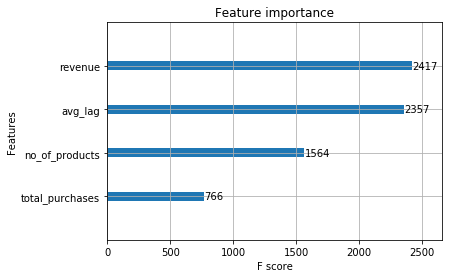

In [48]:
from xgboost import plot_importance
from matplotlib import pyplot

# plot feature importance
plot_importance(xgb1)
pyplot.show()

#### Why XGBoost?

* Classification works well with decision trees always
* Has in built regularization for overfitting
* Parallel processing
* Handles missing values by itself
* Handles class imbalances by itself
* It is not a greedy algorithm like certain other decision tree methods
* Has built in Cross validation
* Can add on data and pick up from the previous run(kind of like epochs and gradient descent in deep learning)

In contrast we could have used other decision trees(RF, standard bagging/boosting), SVMs (definitely don't outperform XGboost in terms of accuracy and speed) or deep learning methods (don't have enough data for this to be useful)

#### We see here that we have gotten 100% accuracy from this model, if we had not - we would have tuned hyperparameters like gamma, learning_rate, depth, and estimators

#### Recommendation engine
* To target all 8 groups of users differently, based on their RECENCY, FREQUENCY, and MONETARY gains - RFM model for customer base
* Combine it with additional insights on time of day, day of week, and week of year (TREND and SEASONALITY), more server bandwidth and more lightening offers for peak times
* Offers to have better inventory turnover for low selling products, when demand goes down
* Also, for each user, their most frequented category (but not bought), offers corresponding to that
* If we had additional data on customers such as their demographics and interests, we could also introduce new schemes for each category
* For window shoppers, (users with sessions but orders), introductory offers
* Introduce Loyalty points for one time users